#**Regression_Assignment**



## Question 1: What is Simple Linear Regression?
**Answer:**  
Simple Linear Regression is a basic statistical method that finds the relationship between two variables: one that predicts (X) and one that is predicted (Y).  
It creates a straight line that best fits the data points. The formula is: Y = a + bX


Where:  
- `a` = intercept (where the line crosses the Y-axis)  
- `b` = slope (how much Y changes with X)

The goal is to find `a` and `b` values that make the line fit the data as closely as possible.


##Question 2: What are the key assumptions of Simple Linear Regression?
**Answer:**  
Simple Linear Regression relies on these key assumptions:

1. **Linearity**: X and Y have a straight-line relationship.  
2. **Independence**: Data points are independent of each other.  
3. **Equal Variance (Homoscedasticity)**: Spread of residuals is consistent.  
4. **Normal Errors**: Residuals follow a normal distribution.  
5. **No Outliers**: Extreme values shouldn't overly influence the line.  
6. **Accurate Measurement**: The independent variable X should be measured correctly.

If these assumptions are broken, the model’s predictions might not be trustworthy.


##Question 3: What is heteroscedasticity, and why is it important to address in regression models?"
**Answer:**  
Heteroscedasticity means the errors (residuals) in a regression model don't have a constant spread — they might fan out or shrink as X increases.

Why it's important to fix:
1. Confidence intervals and p-values become inaccurate  
2. Statistical tests lose reliability  
3. Prediction accuracy varies too much  
4. It may signal missing variables

**Fixes include**: applying log/sqrt transformations, using weighted least squares, or robust regression methods.
"""

##Question 4: What is Multiple Linear Regression?
**Answer:**  
Multiple Linear Regression uses **two or more independent variables** to predict one dependent variable.  
The general formula is: Y = a + b₁X₁ + b₂X₂ + ... + bₙXₙ


Each `X` is a feature (like area, rooms, location) and each `b` is its weight.  
It helps when one factor isn’t enough to explain the outcome.
"""))

##Question 5: What is polynomial regression, and how does it differ from linear regression?
**Answer:**  
Polynomial regression fits a **curved line** (not straight) to model complex relationships.  
It uses powers of X (like X², X³...) to capture bends in the data.

**Differences from Linear Regression:**
1. Fits curves instead of straight lines  
2. Uses transformed features (X², X³...)  
3. Captures more complex patterns  
4. Can overfit if degree is too high  
5. Relationship between X and Y changes across X values
"""


##Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:
###X = [1, 2, 3, 4, 5]
### Y = [2.1, 4.3, 6.1, 7.9, 10.2]
###Plot the regression line over the data points.
(Include your Python code and output in the code box below.)


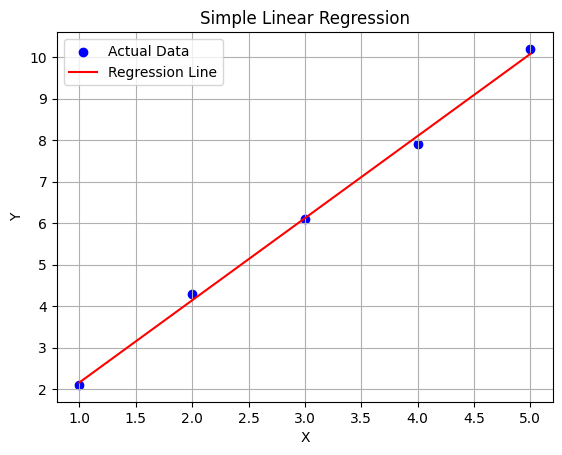

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and train the model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Plotting
plt.scatter(X, Y, color='blue', label='Actual Data')  # data points
plt.plot(X, Y_pred, color='red', label='Regression Line')  # regression line
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


##Question 7: Fit a Multiple Linear Regression model on this sample data:
Area = [1200, 1500, 1800, 2000]

Rooms = [2, 3, 3, 4]

Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.

In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

# Define X and y
X = df[['Area', 'Rooms']]
y = df['Price']

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit Multiple Linear Regression model
model = sm.OLS(y, X_with_const).fit()

# Show model summary
print("Regression Summary:\n")
print(model.summary())

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):\n")
print(vif_data)


Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Thu, 17 Jul 2025   Prob (F-statistic):             0.0377
Time:                        10:25:41   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.29

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


##Question 8: Implement polynomial regression on the following data:
X = [1, 2, 3, 4, 5]

Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.

(Include your Python code and output in the code box below.)

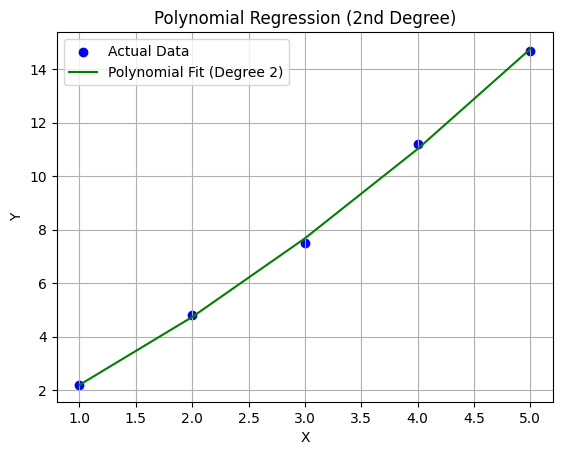

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform to polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict
Y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='green', label='Polynomial Fit (Degree 2)')
plt.title('Polynomial Regression (2nd Degree)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


##Question 9: Create a residuals plot for a regression model trained on this data:
X = [10, 20, 30, 40, 50]

Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals. (Include your
Python code and output in the code box below.)


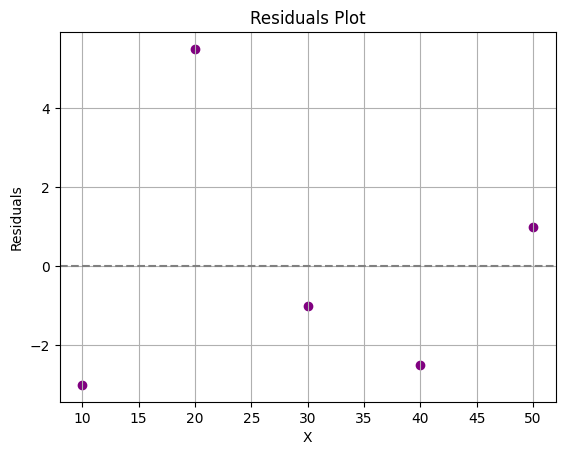

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Train linear regression model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calculate residuals (actual - predicted)
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


##Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

Answer:

To address heteroscedasticity and multicollinearity in a real estate price prediction model:
For Heteroscedasticity:
1.	Transform variables: Log transform price and/or features
2.	Weighted Least Squares: Give different weights to observations
3.	Robust standard errors: Use heteroscedasticity-consistent SEs
For Multicollinearity:
1.	Calculate VIF: Identify highly correlated features
2.	Feature selection: Remove or combine highly correlated features
3.	Regularization techniques: Consider Ridge or Lasso regression
By addressing these issues, we can improve the model's reliability and accuracy for predicting house prices.
